In [76]:
#load all the necessary python libraries to preprocess the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew

pd.options.display.float_format = "{:.2f}".format # float format 2 number in decimal


In [6]:
# load data
#ojol=pd.read_csv('amal_dsa_ojol_dataset_clean1_v2.csv',delimiter="|")
ojol_clean=pd.read_csv('../dsa_ojol_dataset_clean1_v2.csv',delimiter="|")

# DATA UNDERSTANDING
## Explore Data

In [7]:
#ojol_shape=ojol.shape
#print("shape of the data:",ojol.shape)
ojol_clean_shape=ojol_clean.shape
#print("shape of the data (filtered):",ojol_clean_shape)

#print("{} rows x {} columns".format(ojol_shape[0], ojol_shape[1])) 
print("{} rows x {} columns".format(ojol_clean_shape[0], ojol_clean_shape[1])) 

695597 rows x 31 columns


In [8]:
ojol_clean.head(5)

,msisdn,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,...,trx_sms_offnet,payload,total_recharge_mytsel,total_recharge_urp,region,flag_taker,los,first_rank_category,ojol,total_recharge
0,628111563256,1,10092,8132,800,0,0,0,0,0,...,0,9229653,0,0,06.Eastern Jabotabek,0,1506,Transportation,Y,10000
1,628112589620,0,133657,131622,1410,0,0,0,0,0,...,1,3668863,0,0,08.Jateng,0,1349,Transportation,NaN,135000
2,628112821723,0,30006,28556,1450,0,0,0,0,0,...,5,2097283,0,0,08.Jateng,0,775,Transportation,NaN,30000
3,628113288867,1,44503,7133,200,0,0,0,0,0,...,0,1974025,0,0,09.Jatim,0,1485,Games,Y,15000
4,628113917571,1,5073,4473,600,0,0,0,0,0,...,0,10023262,0,0,10.Balinusra,0,1130,Transportation,Y,15000


In [9]:
ojol_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695597 entries, 0 to 695596
Data columns (total 31 columns):
msisdn                   695597 non-null int64
mytsel_app_user          695597 non-null int64
total_revenue            695597 non-null int64
rev_voice                695597 non-null int64
rev_sms                  695597 non-null int64
rev_broadband            695597 non-null int64
rev_voice_pack           695597 non-null int64
rev_sms_pack             695597 non-null int64
rev_data_pack            695597 non-null int64
rev_pack_mytsel          695597 non-null int64
rev_voice_pack_mytsel    695597 non-null int64
rev_sms_pack_mytsel      695597 non-null int64
rev_data_pack_mytsel     695597 non-null int64
trx_voice                695597 non-null int64
trx_voice_onnet          695597 non-null int64
trx_voice_offnet         695597 non-null int64
mou_voice                695597 non-null int64
mou_voice_onnet          695597 non-null int64
mou_voice_offnet         695597 non-null in

In [10]:
ojol_clean.describe().T 

,count,mean,std,min,25%,50%,75%,max
msisdn,695597.0,6.213143e+12,6.207486e+11,6.281116e+11,6.281289e+12,6.281382e+12,6.282245e+12,6.285400e+12
mytsel_app_user,695597.0,5.111739e-01,4.998755e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
total_revenue,695597.0,1.285793e+05,1.029296e+05,3.000000e+00,7.546000e+04,9.919600e+04,1.600010e+05,2.375649e+07
rev_voice,695597.0,9.242296e+03,2.415494e+04,0.000000e+00,0.000000e+00,0.000000e+00,7.467000e+03,2.348500e+06
rev_sms,695597.0,1.050805e+03,3.917839e+03,0.000000e+00,0.000000e+00,1.650000e+02,8.250000e+02,5.910000e+05
rev_broadband,695597.0,1.087423e+05,7.950347e+04,0.000000e+00,7.500000e+04,7.880100e+04,1.500000e+05,1.322500e+07
rev_voice_pack,695597.0,3.547871e+03,1.594635e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.348500e+06
rev_sms_pack,695597.0,2.839516e+01,1.274283e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.910000e+05
rev_data_pack,695597.0,1.042546e+05,7.740342e+04,0.000000e+00,7.500000e+04,7.500000e+04,1.500000e+05,1.322500e+07
rev_pack_mytsel,695597.0,1.264286e+04,5.868835e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.426560e+07


### Duplicate Data

In [11]:
ojol_clean.duplicated().sum()

0

### Missing Values

In [12]:
missing_data_clean=pd.DataFrame({'total_missing':ojol_clean.isnull().sum(), '%missing':(ojol_clean.isnull().sum())/(ojol_clean.isnull().count())*100})
missing_data_clean[missing_data_clean['total_missing']>0]

,total_missing,%missing
first_rank_category,5078,0.730020
ojol,340026,48.882615


In [13]:
ojol_clean['ojol']=ojol_clean['ojol'].replace(np.NaN,0).replace('Y',1)
ojol_clean.head(5)

,msisdn,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,...,trx_sms_offnet,payload,total_recharge_mytsel,total_recharge_urp,region,flag_taker,los,first_rank_category,ojol,total_recharge
0,628111563256,1,10092,8132,800,0,0,0,0,0,...,0,9229653,0,0,06.Eastern Jabotabek,0,1506,Transportation,1,10000
1,628112589620,0,133657,131622,1410,0,0,0,0,0,...,1,3668863,0,0,08.Jateng,0,1349,Transportation,0,135000
2,628112821723,0,30006,28556,1450,0,0,0,0,0,...,5,2097283,0,0,08.Jateng,0,775,Transportation,0,30000
3,628113288867,1,44503,7133,200,0,0,0,0,0,...,0,1974025,0,0,09.Jatim,0,1485,Games,1,15000
4,628113917571,1,5073,4473,600,0,0,0,0,0,...,0,10023262,0,0,10.Balinusra,0,1130,Transportation,1,15000


In [14]:
ojol_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695597 entries, 0 to 695596
Data columns (total 31 columns):
msisdn                   695597 non-null int64
mytsel_app_user          695597 non-null int64
total_revenue            695597 non-null int64
rev_voice                695597 non-null int64
rev_sms                  695597 non-null int64
rev_broadband            695597 non-null int64
rev_voice_pack           695597 non-null int64
rev_sms_pack             695597 non-null int64
rev_data_pack            695597 non-null int64
rev_pack_mytsel          695597 non-null int64
rev_voice_pack_mytsel    695597 non-null int64
rev_sms_pack_mytsel      695597 non-null int64
rev_data_pack_mytsel     695597 non-null int64
trx_voice                695597 non-null int64
trx_voice_onnet          695597 non-null int64
trx_voice_offnet         695597 non-null int64
mou_voice                695597 non-null int64
mou_voice_onnet          695597 non-null int64
mou_voice_offnet         695597 non-null in

In [15]:
ojol_clean['ojol'].value_counts()

1    355571
0    340026
Name: ojol, dtype: int64

In [16]:
missing_data_clean=pd.DataFrame({'total_missing':ojol_clean.isnull().sum(), '%missing':(ojol_clean.isnull().sum())/(ojol_clean.isnull().count())*100})
missing_data_clean[missing_data_clean['total_missing']>0]

,total_missing,%missing
first_rank_category,5078,0.73002


In [17]:
ojol_clean['first_rank_category']=ojol_clean['first_rank_category'].replace(np.NaN,'undefined')
ojol_clean.isnull().sum()

msisdn                   0
mytsel_app_user          0
total_revenue            0
rev_voice                0
rev_sms                  0
rev_broadband            0
rev_voice_pack           0
rev_sms_pack             0
rev_data_pack            0
rev_pack_mytsel          0
rev_voice_pack_mytsel    0
rev_sms_pack_mytsel      0
rev_data_pack_mytsel     0
trx_voice                0
trx_voice_onnet          0
trx_voice_offnet         0
mou_voice                0
mou_voice_onnet          0
mou_voice_offnet         0
trx_sms                  0
trx_sms_onnet            0
trx_sms_offnet           0
payload                  0
total_recharge_mytsel    0
total_recharge_urp       0
region                   0
flag_taker               0
los                      0
first_rank_category      0
ojol                     0
total_recharge           0
dtype: int64

In [18]:
#ojol_clean.describe().T
ojol_clean=ojol_clean.drop(['rev_voice_pack_mytsel', 'rev_sms_pack_mytsel', 'rev_data_pack_mytsel', 'total_recharge_urp'], axis = 1)

In [19]:
ojol_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
msisdn,695597.0,6.213143e+12,6.207486e+11,6.281116e+11,6.281289e+12,6.281382e+12,6.282245e+12,6.285400e+12
mytsel_app_user,695597.0,5.111739e-01,4.998755e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
total_revenue,695597.0,1.285793e+05,1.029296e+05,3.000000e+00,7.546000e+04,9.919600e+04,1.600010e+05,2.375649e+07
rev_voice,695597.0,9.242296e+03,2.415494e+04,0.000000e+00,0.000000e+00,0.000000e+00,7.467000e+03,2.348500e+06
rev_sms,695597.0,1.050805e+03,3.917839e+03,0.000000e+00,0.000000e+00,1.650000e+02,8.250000e+02,5.910000e+05
rev_broadband,695597.0,1.087423e+05,7.950347e+04,0.000000e+00,7.500000e+04,7.880100e+04,1.500000e+05,1.322500e+07
rev_voice_pack,695597.0,3.547871e+03,1.594635e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.348500e+06
rev_sms_pack,695597.0,2.839516e+01,1.274283e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.910000e+05
rev_data_pack,695597.0,1.042546e+05,7.740342e+04,0.000000e+00,7.500000e+04,7.500000e+04,1.500000e+05,1.322500e+07
rev_pack_mytsel,695597.0,1.264286e+04,5.868835e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.426560e+07


### Values Checking 

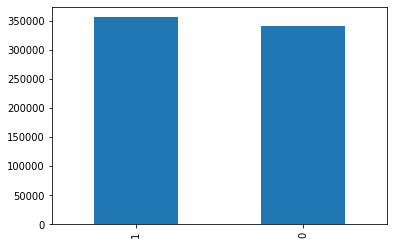

In [20]:
ojol_clean['mytsel_app_user'].value_counts().plot(kind='bar')

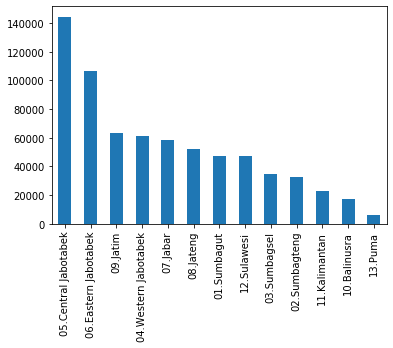

In [21]:
ojol_clean['region'].value_counts().plot(kind='bar')

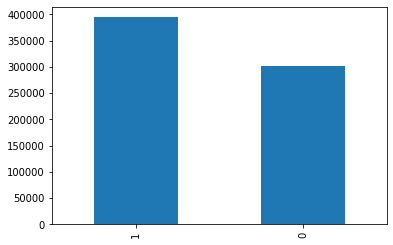

In [22]:
ojol_clean['flag_taker'].value_counts().plot(kind='bar')

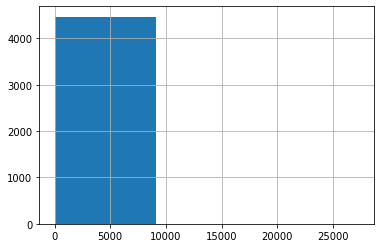

In [23]:
ojol_clean['los'].value_counts().hist(bins=3);

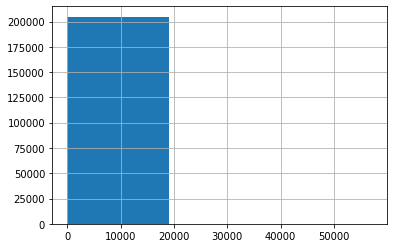

In [24]:
ojol_clean['total_revenue'].value_counts().hist(bins=3);


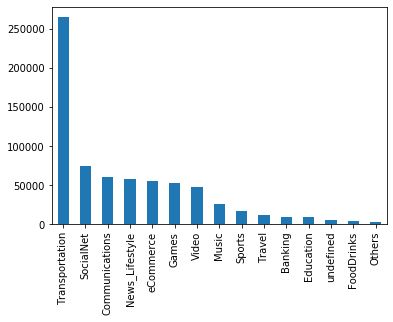

In [25]:
ojol_clean['first_rank_category'].value_counts().plot(kind='bar')

## Feature Engineering

In [26]:
ojol_clean['rev_voice_ratio']=ojol_clean['rev_voice']/ojol_clean['total_revenue']
ojol_clean['rev_voice_ratio']=ojol_clean['rev_voice_ratio'].fillna(value=0)

ojol_clean['rev_sms_ratio']=ojol_clean['rev_sms']/ojol_clean['total_revenue']
ojol_clean['rev_sms_ratio']=ojol_clean['rev_sms_ratio'].fillna(value=0)

ojol_clean['rev_broadband_ratio']=ojol_clean['rev_broadband']/ojol_clean['total_revenue']
ojol_clean['rev_broadband_ratio']=ojol_clean['rev_broadband_ratio'].fillna(value=0)

ojol_clean['trx_voice_onnet_ratio']=ojol_clean['trx_voice_onnet']/ojol_clean['trx_voice']
ojol_clean['trx_voice_onnet_ratio']=ojol_clean['trx_voice_onnet_ratio'].fillna(value=0)

ojol_clean['trx_voice_offnet_ratio']=ojol_clean['trx_voice_offnet']/ojol_clean['trx_voice']
ojol_clean['trx_voice_offnet_ratio']=ojol_clean['trx_voice_offnet_ratio'].fillna(value=0)

ojol_clean['trx_sms_onnet_ratio']=ojol_clean['trx_sms_onnet']/ojol_clean['trx_sms']
ojol_clean['trx_sms_onnet_ratio']=ojol_clean['trx_sms_onnet_ratio'].fillna(value=0)

ojol_clean['trx_sms_offnet_ratio']=ojol_clean['trx_sms_offnet']/ojol_clean['trx_sms']
ojol_clean['trx_sms_offnet_ratio']=ojol_clean['trx_sms_offnet_ratio'].fillna(value=0)

ojol_clean['mou_voice_onnet_ratio']=ojol_clean['mou_voice_onnet']/ojol_clean['mou_voice']
ojol_clean['mou_voice_onnet_ratio']=ojol_clean['mou_voice_onnet_ratio'].fillna(value=0)

ojol_clean['mou_voice_offnet_ratio']=ojol_clean['mou_voice_offnet']/ojol_clean['mou_voice']
ojol_clean['mou_voice_offnet_ratio']=ojol_clean['mou_voice_offnet_ratio'].fillna(value=0)

ojol_clean['recharge_revenue_ratio']=ojol_clean['total_recharge']/ojol_clean['total_revenue']
ojol_clean['recharge_revenue_ratio']=ojol_clean['recharge_revenue_ratio'].fillna(value=0)

ojol_clean['average_rev_voice_per_trx']=(ojol_clean['rev_voice'])/ojol_clean['trx_voice']
ojol_clean['average_rev_voice_per_trx']=ojol_clean['average_rev_voice_per_trx'].fillna(value=0)

ojol_clean['average_rev_sms_per_trx']=(ojol_clean['rev_sms'])/ojol_clean['trx_sms']
ojol_clean['average_rev_sms_per_trx']=ojol_clean['average_rev_sms_per_trx'].fillna(value=0)

ojol_clean['average_rev_data_per_trx']=(ojol_clean['rev_broadband'])/ojol_clean['payload']
ojol_clean['average_rev_data_per_trx']=ojol_clean['average_rev_data_per_trx'].fillna(value=0)

ojol_clean['average_mou_voice_per_trx']=(ojol_clean['mou_voice'])/ojol_clean['trx_voice']
ojol_clean['average_mou_voice_per_trx']=ojol_clean['average_mou_voice_per_trx'].fillna(value=0)


In [27]:
ojol_clean.columns

Index(['msisdn', 'mytsel_app_user', 'total_revenue', 'rev_voice', 'rev_sms',
       'rev_broadband', 'rev_voice_pack', 'rev_sms_pack', 'rev_data_pack',
       'rev_pack_mytsel', 'trx_voice', 'trx_voice_onnet', 'trx_voice_offnet',
       'mou_voice', 'mou_voice_onnet', 'mou_voice_offnet', 'trx_sms',
       'trx_sms_onnet', 'trx_sms_offnet', 'payload', 'total_recharge_mytsel',
       'region', 'flag_taker', 'los', 'first_rank_category', 'ojol',
       'total_recharge', 'rev_voice_ratio', 'rev_sms_ratio',
       'rev_broadband_ratio', 'trx_voice_onnet_ratio',
       'trx_voice_offnet_ratio', 'trx_sms_onnet_ratio', 'trx_sms_offnet_ratio',
       'mou_voice_onnet_ratio', 'mou_voice_offnet_ratio',
       'recharge_revenue_ratio', 'average_rev_voice_per_trx',
       'average_rev_sms_per_trx', 'average_rev_data_per_trx',
       'average_mou_voice_per_trx'],
      dtype='object')

In [28]:
ojol_clean.head(10)

,msisdn,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,...,trx_voice_offnet_ratio,trx_sms_onnet_ratio,trx_sms_offnet_ratio,mou_voice_onnet_ratio,mou_voice_offnet_ratio,recharge_revenue_ratio,average_rev_voice_per_trx,average_rev_sms_per_trx,average_rev_data_per_trx,average_mou_voice_per_trx
0,628111563256,1,10092,8132,800,0,0,0,0,0,...,0.480000,1.000000,0.000000,0.333333,0.500000,0.990884,325.280000,200.000000,0.000000,0.240000
1,628112589620,0,133657,131622,1410,0,0,0,0,0,...,0.354839,0.857143,0.142857,0.617647,0.372549,1.010048,707.645161,201.428571,0.000000,0.548387
2,628112821723,0,30006,28556,1450,0,0,0,0,0,...,0.777778,0.285714,0.714286,0.190476,0.761905,0.999800,793.222222,207.142857,0.000000,0.583333
3,628113288867,1,44503,7133,200,0,0,0,0,0,...,0.318182,1.000000,0.000000,0.809524,0.142857,0.337056,324.227273,200.000000,0.000000,0.954545
4,628113917571,1,5073,4473,600,0,0,0,0,0,...,0.000000,1.000000,0.000000,1.000000,0.000000,2.956830,38.560345,100.000000,0.000000,1.267241
5,628114446730,1,3512,662,400,0,0,0,0,0,...,1.000000,1.000000,0.000000,0.000000,0.000000,4.271071,662.000000,200.000000,0.000000,0.000000
6,628115651278,1,35001,31451,2000,0,0,0,0,0,...,0.029412,1.000000,0.000000,1.000000,0.000000,0.999971,925.029412,200.000000,0.000000,0.705882
7,628115904142,1,20010,18350,1000,0,0,0,0,0,...,0.142857,1.000000,0.000000,1.000000,0.000000,0.999500,2621.428571,200.000000,0.000000,2.000000
8,628116615233,1,8518,8463,0,0,0,0,0,0,...,0.000000,1.000000,0.000000,1.000000,0.000000,8.804884,1057.875000,0.000000,0.000000,3.375000
9,6281210000232,0,171881,0,0,170031,0,0,150000,0,...,0.176471,1.000000,0.000000,0.682119,0.033113,1.163596,0.000000,0.000000,0.007773,2.960784


In [29]:
ojol_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695597 entries, 0 to 695596
Data columns (total 41 columns):
msisdn                       695597 non-null int64
mytsel_app_user              695597 non-null int64
total_revenue                695597 non-null int64
rev_voice                    695597 non-null int64
rev_sms                      695597 non-null int64
rev_broadband                695597 non-null int64
rev_voice_pack               695597 non-null int64
rev_sms_pack                 695597 non-null int64
rev_data_pack                695597 non-null int64
rev_pack_mytsel              695597 non-null int64
trx_voice                    695597 non-null int64
trx_voice_onnet              695597 non-null int64
trx_voice_offnet             695597 non-null int64
mou_voice                    695597 non-null int64
mou_voice_onnet              695597 non-null int64
mou_voice_offnet             695597 non-null int64
trx_sms                      695597 non-null int64
trx_sms_onnet         

### Remove Unrelated Features

In [30]:
ojol_clean.drop(['msisdn'], axis = 1,inplace=True)

In [31]:
ojol_clean.head(5)

,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_broadband,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,trx_voice,...,trx_voice_offnet_ratio,trx_sms_onnet_ratio,trx_sms_offnet_ratio,mou_voice_onnet_ratio,mou_voice_offnet_ratio,recharge_revenue_ratio,average_rev_voice_per_trx,average_rev_sms_per_trx,average_rev_data_per_trx,average_mou_voice_per_trx
0,1,10092,8132,800,0,0,0,0,0,25,...,0.480000,1.000000,0.000000,0.333333,0.500000,0.990884,325.280000,200.000000,0.0,0.240000
1,0,133657,131622,1410,0,0,0,0,0,186,...,0.354839,0.857143,0.142857,0.617647,0.372549,1.010048,707.645161,201.428571,0.0,0.548387
2,0,30006,28556,1450,0,0,0,0,0,36,...,0.777778,0.285714,0.714286,0.190476,0.761905,0.999800,793.222222,207.142857,0.0,0.583333
3,1,44503,7133,200,0,0,0,0,0,22,...,0.318182,1.000000,0.000000,0.809524,0.142857,0.337056,324.227273,200.000000,0.0,0.954545
4,1,5073,4473,600,0,0,0,0,0,116,...,0.000000,1.000000,0.000000,1.000000,0.000000,2.956830,38.560345,100.000000,0.0,1.267241


### Drop variable same value

In [32]:
display(ojol_clean['mytsel_app_user'].value_counts())
display(ojol_clean['ojol'].value_counts())
print("ojol has no same value to mytsel_app_user")

1    355571
0    340026
Name: mytsel_app_user, dtype: int64

1    355571
0    340026
Name: ojol, dtype: int64

ojol has no same value to mytsel_app_user


In [33]:
ojol_clean.drop(['ojol'],axis=1,inplace=True)

### Feature Transformation

#### Handling Multicollinearity

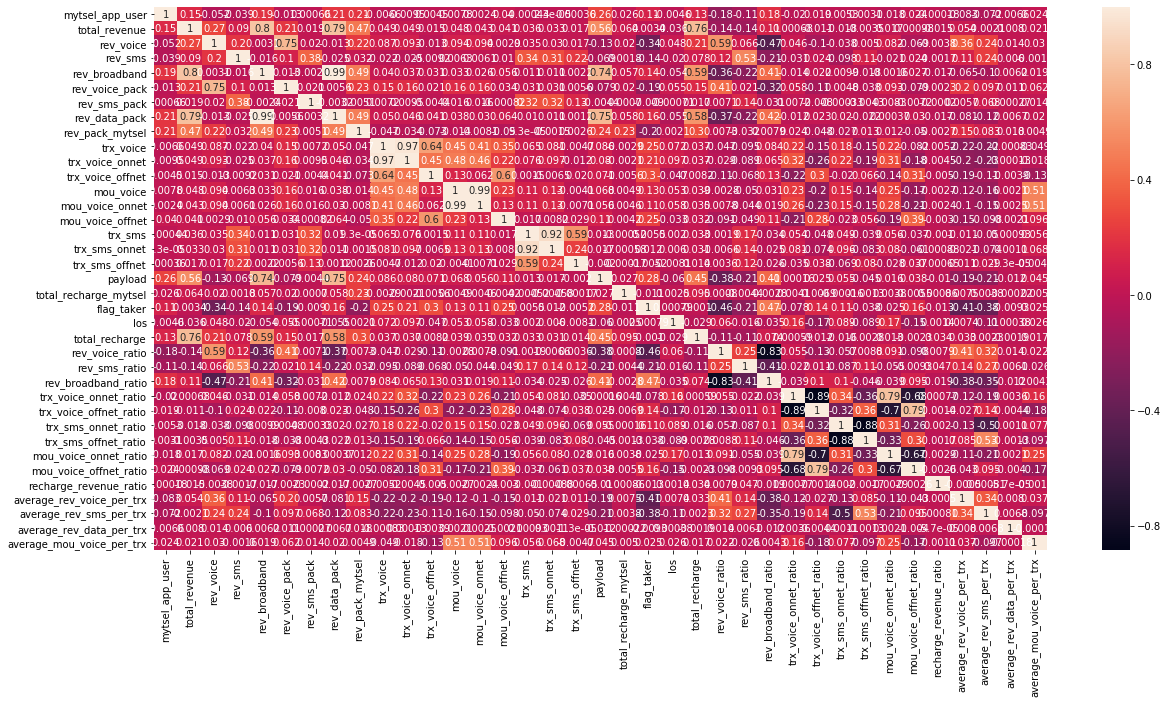

In [34]:
plt.figure(figsize=(20,10)) 
sns.heatmap(ojol_clean.corr(), annot=True) 

In [35]:
ojol_clean.columns

Index(['mytsel_app_user', 'total_revenue', 'rev_voice', 'rev_sms',
       'rev_broadband', 'rev_voice_pack', 'rev_sms_pack', 'rev_data_pack',
       'rev_pack_mytsel', 'trx_voice', 'trx_voice_onnet', 'trx_voice_offnet',
       'mou_voice', 'mou_voice_onnet', 'mou_voice_offnet', 'trx_sms',
       'trx_sms_onnet', 'trx_sms_offnet', 'payload', 'total_recharge_mytsel',
       'region', 'flag_taker', 'los', 'first_rank_category', 'total_recharge',
       'rev_voice_ratio', 'rev_sms_ratio', 'rev_broadband_ratio',
       'trx_voice_onnet_ratio', 'trx_voice_offnet_ratio',
       'trx_sms_onnet_ratio', 'trx_sms_offnet_ratio', 'mou_voice_onnet_ratio',
       'mou_voice_offnet_ratio', 'recharge_revenue_ratio',
       'average_rev_voice_per_trx', 'average_rev_sms_per_trx',
       'average_rev_data_per_trx', 'average_mou_voice_per_trx'],
      dtype='object')

In [36]:
numerical = ['total_revenue', 'rev_voice', 'rev_sms',
       'rev_broadband', 'rev_voice_pack', 'rev_sms_pack', 'rev_data_pack',
       'rev_pack_mytsel', 'trx_voice', 'trx_voice_onnet', 'trx_voice_offnet',
       'mou_voice', 'mou_voice_onnet', 'mou_voice_offnet', 'trx_sms',
       'trx_sms_onnet', 'trx_sms_offnet', 'payload', 'total_recharge_mytsel',
         'los', 'total_recharge',
       'rev_voice_ratio', 'rev_sms_ratio', 'rev_broadband_ratio',
       'trx_voice_onnet_ratio', 'trx_voice_offnet_ratio',
       'trx_sms_onnet_ratio', 'trx_sms_offnet_ratio', 'mou_voice_onnet_ratio',
       'mou_voice_offnet_ratio', 'recharge_revenue_ratio',
       'average_rev_voice_per_trx', 'average_rev_sms_per_trx',
       'average_rev_data_per_trx', 'average_mou_voice_per_trx'
]

In [37]:
X = ojol_clean[numerical]
y =  ojol_clean.loc[:, ojol_clean.columns == 'flag_taker']

In [38]:
y.head()

,flag_taker
0,0
1,0
2,0
3,0
4,0


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['features']=X.columns

In [41]:
vif.round(1).sort_values(by='VIF Factor',ascending=False)

,VIF Factor,features
11,2009.0,mou_voice
14,1963.8,trx_sms
12,1849.2,mou_voice_onnet
8,1438.2,trx_voice
15,1356.8,trx_sms_onnet
9,978.0,trx_voice_onnet
16,293.0,trx_sms_offnet
3,226.6,rev_broadband
6,223.7,rev_data_pack
10,85.8,trx_voice_offnet


In [42]:
Columns_to_drop=['mou_voice','trx_sms','trx_voice','rev_broadband','trx_voice_onnet_ratio','rev_broadband_ratio','trx_sms_onnet_ratio']

In [43]:
X.drop(Columns_to_drop,axis=1, inplace=True)

In [44]:
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['features']=X.columns
vif.round(1).sort_values(by='VIF Factor',ascending=False)

,VIF Factor,features
5,14.8,rev_data_pack
0,13.1,total_revenue
13,6.6,payload
19,6.4,trx_voice_offnet_ratio
22,5.3,mou_voice_offnet_ratio
21,5.2,mou_voice_onnet_ratio
16,5.1,total_recharge
1,4.2,rev_voice
7,3.2,trx_voice_onnet
8,3.2,trx_voice_offnet


In [45]:
ojol_clean.drop(Columns_to_drop,axis=1,inplace=True)

In [46]:
ojol_clean.shape

(695597, 32)

#### Handling Outlier

In [47]:
numerical_new= ['total_revenue', 'rev_voice', 'rev_sms','rev_voice_pack', 'rev_sms_pack', 'rev_data_pack',
                'rev_pack_mytsel', 'trx_voice_onnet', 'trx_voice_offnet','mou_voice_onnet', 'mou_voice_offnet',
                'trx_sms_onnet','trx_sms_offnet', 'payload', 'total_recharge_mytsel','los','total_recharge',
                'rev_voice_ratio','rev_sms_ratio','trx_voice_offnet_ratio','trx_sms_offnet_ratio', 'mou_voice_onnet_ratio','mou_voice_offnet_ratio',
                'recharge_revenue_ratio','average_rev_voice_per_trx', 'average_rev_sms_per_trx','average_rev_data_per_trx', 'average_mou_voice_per_trx']
for col_name in numerical_new:
    q1 = ojol_clean[col_name].quantile(0.25)
    q3 = ojol_clean[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-1.5*iqr
    high = q1+1.5*iqr
    print("Number of Outliers ",col_name," = ",len(ojol_clean.loc[((ojol_clean[col_name] < low) | (ojol_clean[col_name] > high)), col_name]))

Number of Outliers  total_revenue  =  101402
Number of Outliers  rev_voice  =  139850
Number of Outliers  rev_sms  =  128426
Number of Outliers  rev_voice_pack  =  106021
Number of Outliers  rev_sms_pack  =  2240
Number of Outliers  rev_data_pack  =  76243
Number of Outliers  rev_pack_mytsel  =  75485
Number of Outliers  trx_voice_onnet  =  117866
Number of Outliers  trx_voice_offnet  =  115970
Number of Outliers  mou_voice_onnet  =  124684
Number of Outliers  mou_voice_offnet  =  116365
Number of Outliers  trx_sms_onnet  =  133550
Number of Outliers  trx_sms_offnet  =  109752
Number of Outliers  payload  =  91819
Number of Outliers  total_recharge_mytsel  =  3484
Number of Outliers  los  =  109963
Number of Outliers  total_recharge  =  100026
Number of Outliers  rev_voice_ratio  =  144352
Number of Outliers  rev_sms_ratio  =  131265
Number of Outliers  trx_voice_offnet_ratio  =  58755
Number of Outliers  trx_sms_offnet_ratio  =  107085
Number of Outliers  mou_voice_onnet_ratio  =  0
N

In [48]:
from sklearn.preprocessing import KBinsDiscretizer
for col_name in numerical_new:
    binner = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy="quantile", )
    ojol_clean[col_name+'_cat'] = binner.fit_transform(ojol_clean[[col_name]])

In [49]:
for col_name in numerical_new:
    print('bin edges '+col_name,binner.fit(ojol_clean[[col_name]]).bin_edges_)

bin edges total_revenue [array([3.0000000e+00, 5.4478600e+04, 7.5000000e+04, 7.7080000e+04,
       8.4126000e+04, 9.9196000e+04, 1.2566000e+05, 1.5184000e+05,
       1.7500000e+05, 2.3163340e+05, 2.3756492e+07])]
bin edges rev_voice [array([0.0000e+00, 1.2020e+03, 4.6630e+03, 1.1312e+04, 2.7429e+04,
       2.3485e+06])]
bin edges rev_sms [array([0.00e+00, 1.65e+02, 3.50e+02, 6.60e+02, 1.05e+03, 2.31e+03,
       5.91e+05])]
bin edges rev_voice_pack [array([      0.,    5400., 2348500.])]
bin edges rev_sms_pack [array([     0., 591000.])]
bin edges rev_data_pack [array([       0.,    16000.,    75000.,    90001.,   149000.,   150000.,
         199000., 13225000.])]
bin edges rev_pack_mytsel [array([0.00000e+00, 1.30000e+04, 1.42656e+07])]
bin edges trx_voice_onnet [array([0.000e+00, 3.000e+00, 8.000e+00, 1.400e+01, 2.300e+01, 3.600e+01,
       5.300e+01, 8.000e+01, 1.240e+02, 2.140e+02, 3.898e+03])]
bin edges trx_voice_offnet [array([0.000e+00, 1.000e+00, 3.000e+00, 5.000e+00, 9.000e+00,

In [50]:
ojol_clean.head()

,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,trx_voice_onnet,trx_voice_offnet,...,rev_sms_ratio_cat,trx_voice_offnet_ratio_cat,trx_sms_offnet_ratio_cat,mou_voice_onnet_ratio_cat,mou_voice_offnet_ratio_cat,recharge_revenue_ratio_cat,average_rev_voice_per_trx_cat,average_rev_sms_per_trx_cat,average_rev_data_per_trx_cat,average_mou_voice_per_trx_cat
0,1,10092,8132,800,0,0,0,0,12,12,...,5.0,7.0,0.0,1.0,6.0,3.0,2.0,3.0,0.0,0.0
1,0,133657,131622,1410,0,0,0,0,120,66,...,3.0,5.0,1.0,3.0,5.0,5.0,3.0,3.0,0.0,2.0
2,0,30006,28556,1450,0,0,0,0,8,28,...,5.0,8.0,3.0,1.0,7.0,4.0,3.0,3.0,0.0,2.0
3,1,44503,7133,200,0,0,0,0,15,7,...,2.0,5.0,0.0,5.0,3.0,0.0,2.0,3.0,0.0,4.0
4,1,5073,4473,600,0,0,0,0,116,0,...,5.0,0.0,0.0,8.0,0.0,8.0,1.0,1.0,0.0,5.0


In [51]:
ojol_clean[['mytsel_app_user', 'flag_taker',
       'total_revenue_cat', 'rev_voice_cat', 'rev_sms_cat',
       'rev_voice_pack_cat', 'rev_sms_pack_cat', 'rev_data_pack_cat',
       'rev_pack_mytsel_cat', 'trx_voice_onnet_cat', 'trx_voice_offnet_cat',
       'mou_voice_onnet_cat', 'mou_voice_offnet_cat', 'trx_sms_onnet_cat',
       'trx_sms_offnet_cat', 'payload_cat', 'total_recharge_mytsel_cat',
       'los_cat', 'total_recharge_cat', 'rev_voice_ratio_cat',
       'rev_sms_ratio_cat', 'trx_voice_offnet_ratio_cat',
       'trx_sms_offnet_ratio_cat', 'mou_voice_onnet_ratio_cat',
       'mou_voice_offnet_ratio_cat', 'recharge_revenue_ratio_cat',
       'average_rev_voice_per_trx_cat', 'average_rev_sms_per_trx_cat',
       'average_rev_data_per_trx_cat', 'average_mou_voice_per_trx_cat']]=ojol_clean[['mytsel_app_user', 'flag_taker',
       'total_revenue_cat', 'rev_voice_cat', 'rev_sms_cat',
       'rev_voice_pack_cat', 'rev_sms_pack_cat', 'rev_data_pack_cat',
       'rev_pack_mytsel_cat', 'trx_voice_onnet_cat', 'trx_voice_offnet_cat',
       'mou_voice_onnet_cat', 'mou_voice_offnet_cat', 'trx_sms_onnet_cat',
       'trx_sms_offnet_cat', 'payload_cat', 'total_recharge_mytsel_cat',
       'los_cat', 'total_recharge_cat', 'rev_voice_ratio_cat',
       'rev_sms_ratio_cat', 'trx_voice_offnet_ratio_cat',
       'trx_sms_offnet_ratio_cat', 'mou_voice_onnet_ratio_cat',
       'mou_voice_offnet_ratio_cat', 'recharge_revenue_ratio_cat',
       'average_rev_voice_per_trx_cat', 'average_rev_sms_per_trx_cat',
       'average_rev_data_per_trx_cat', 'average_mou_voice_per_trx_cat']].astype(int)

In [52]:
ojol_clean.head()

,mytsel_app_user,total_revenue,rev_voice,rev_sms,rev_voice_pack,rev_sms_pack,rev_data_pack,rev_pack_mytsel,trx_voice_onnet,trx_voice_offnet,...,rev_sms_ratio_cat,trx_voice_offnet_ratio_cat,trx_sms_offnet_ratio_cat,mou_voice_onnet_ratio_cat,mou_voice_offnet_ratio_cat,recharge_revenue_ratio_cat,average_rev_voice_per_trx_cat,average_rev_sms_per_trx_cat,average_rev_data_per_trx_cat,average_mou_voice_per_trx_cat
0,1,10092,8132,800,0,0,0,0,12,12,...,5,7,0,1,6,3,2,3,0,0
1,0,133657,131622,1410,0,0,0,0,120,66,...,3,5,1,3,5,5,3,3,0,2
2,0,30006,28556,1450,0,0,0,0,8,28,...,5,8,3,1,7,4,3,3,0,2
3,1,44503,7133,200,0,0,0,0,15,7,...,2,5,0,5,3,0,2,3,0,4
4,1,5073,4473,600,0,0,0,0,116,0,...,5,0,0,8,0,8,1,1,0,5


In [53]:
ojol_clean_2=ojol_clean.drop(numerical_new,axis=1)

In [54]:
ojol_clean_2.head()

,mytsel_app_user,region,flag_taker,first_rank_category,total_revenue_cat,rev_voice_cat,rev_sms_cat,rev_voice_pack_cat,rev_sms_pack_cat,rev_data_pack_cat,...,rev_sms_ratio_cat,trx_voice_offnet_ratio_cat,trx_sms_offnet_ratio_cat,mou_voice_onnet_ratio_cat,mou_voice_offnet_ratio_cat,recharge_revenue_ratio_cat,average_rev_voice_per_trx_cat,average_rev_sms_per_trx_cat,average_rev_data_per_trx_cat,average_mou_voice_per_trx_cat
0,1,06.Eastern Jabotabek,0,Transportation,0,2,3,0,0,0,...,5,7,0,1,6,3,2,3,0,0
1,0,08.Jateng,0,Transportation,6,4,4,0,0,0,...,3,5,1,3,5,5,3,3,0,2
2,0,08.Jateng,0,Transportation,0,4,4,0,0,0,...,5,8,3,1,7,4,3,3,0,2
3,1,09.Jatim,0,Games,0,2,1,0,0,0,...,2,5,0,5,3,0,2,3,0,4
4,1,10.Balinusra,0,Transportation,0,1,2,0,0,0,...,5,0,0,8,0,8,1,1,0,5


In [55]:
ojol_clean_2.shape

(695597, 32)

In [56]:
ojol_clean_2.columns

Index(['mytsel_app_user', 'region', 'flag_taker', 'first_rank_category',
       'total_revenue_cat', 'rev_voice_cat', 'rev_sms_cat',
       'rev_voice_pack_cat', 'rev_sms_pack_cat', 'rev_data_pack_cat',
       'rev_pack_mytsel_cat', 'trx_voice_onnet_cat', 'trx_voice_offnet_cat',
       'mou_voice_onnet_cat', 'mou_voice_offnet_cat', 'trx_sms_onnet_cat',
       'trx_sms_offnet_cat', 'payload_cat', 'total_recharge_mytsel_cat',
       'los_cat', 'total_recharge_cat', 'rev_voice_ratio_cat',
       'rev_sms_ratio_cat', 'trx_voice_offnet_ratio_cat',
       'trx_sms_offnet_ratio_cat', 'mou_voice_onnet_ratio_cat',
       'mou_voice_offnet_ratio_cat', 'recharge_revenue_ratio_cat',
       'average_rev_voice_per_trx_cat', 'average_rev_sms_per_trx_cat',
       'average_rev_data_per_trx_cat', 'average_mou_voice_per_trx_cat'],
      dtype='object')

## Altering categorical data to numerical

In [57]:
first_rank=pd.DataFrame({'category':ojol_clean_2['first_rank_category'].value_counts(), '%':(ojol_clean_2['first_rank_category'].value_counts()/695597)*100})
first_rank

,category,%
Transportation,265103,38.111579
SocialNet,73778,10.606429
Communications,59707,8.583562
News_Lifestyle,57782,8.306821
eCommerce,55317,7.952449
Games,51985,7.473436
Video,48057,6.908742
Music,26045,3.744266
Sports,16432,2.362287
Travel,11178,1.606965


In [58]:
ojol_clean_2['first_rank_category']=ojol_clean_2['first_rank_category'].replace({'Music':'Music & Sports','Sports':'Music & Sports','Travel':'Others',
                                                                                'Banking':'Others','Education':'Others','undefined':'Others','FoodDrinks':'Others'})
first_rank=pd.DataFrame({'category':ojol_clean_2['first_rank_category'].value_counts(), '%':(ojol_clean_2['first_rank_category'].value_counts()/695597)*100})
first_rank

,category,%
Transportation,265103,38.111579
SocialNet,73778,10.606429
Communications,59707,8.583562
News_Lifestyle,57782,8.306821
eCommerce,55317,7.952449
Games,51985,7.473436
Video,48057,6.908742
Music & Sports,42477,6.106553
Others,41391,5.950428


In [59]:
region=pd.DataFrame({'Jumlah Ojol':ojol_clean_2['region'].value_counts(), '%':(ojol_clean_2['region'].value_counts()/695597)*100})
region

,Jumlah Ojol,%
05.Central Jabotabek,144507,20.774529
06.Eastern Jabotabek,106730,15.343654
09.Jatim,63271,9.095928
04.Western Jabotabek,61426,8.830688
07.Jabar,58615,8.426575
08.Jateng,52192,7.503195
01.Sumbagut,47638,6.848506
12.Sulawesi,47605,6.843762
03.Sumbagsel,34777,4.999590
02.Sumbagteng,32631,4.691078


In [60]:
ojol_clean_2['region']=ojol_clean_2['region'].replace({'05.Central Jabotabek':'Area2','06.Eastern Jabotabek':'Area2','04.Western Jabotabek':'Area2','07.Jabar':'Area2',
                                                      '09.Jatim':'Area3','08.Jateng':'Area3','10.Balinusra':'Area3',
                                                      '01.Sumbagut':'Area1','03.Sumbagsel':'Area1','02.Sumbagteng':'Area1',
                                                      '12.Sulawesi':'Area4','11.Kalimantan':'Area4','13.Puma':'Area4'})
region=pd.DataFrame({'Jumlah Ojol':ojol_clean_2['region'].value_counts(), '%':(ojol_clean_2['region'].value_counts()/695597)*100})
region

,Jumlah Ojol,%
Area2,371278,53.375446
Area3,132534,19.053274
Area1,115046,16.539174
Area4,76739,11.032106


In [61]:
first_rank_cat = pd.get_dummies(ojol_clean_2['first_rank_category'])
first_rank_cat.drop(['Others'],axis=1,inplace=True)
ojol_clean_2.drop(['first_rank_category'], axis=1, inplace=True)
ojol_clean_2 = pd.concat([ojol_clean_2, first_rank_cat], axis=1)

In [62]:
ojol_clean_2.columns

Index(['mytsel_app_user', 'region', 'flag_taker', 'total_revenue_cat',
       'rev_voice_cat', 'rev_sms_cat', 'rev_voice_pack_cat',
       'rev_sms_pack_cat', 'rev_data_pack_cat', 'rev_pack_mytsel_cat',
       'trx_voice_onnet_cat', 'trx_voice_offnet_cat', 'mou_voice_onnet_cat',
       'mou_voice_offnet_cat', 'trx_sms_onnet_cat', 'trx_sms_offnet_cat',
       'payload_cat', 'total_recharge_mytsel_cat', 'los_cat',
       'total_recharge_cat', 'rev_voice_ratio_cat', 'rev_sms_ratio_cat',
       'trx_voice_offnet_ratio_cat', 'trx_sms_offnet_ratio_cat',
       'mou_voice_onnet_ratio_cat', 'mou_voice_offnet_ratio_cat',
       'recharge_revenue_ratio_cat', 'average_rev_voice_per_trx_cat',
       'average_rev_sms_per_trx_cat', 'average_rev_data_per_trx_cat',
       'average_mou_voice_per_trx_cat', 'Communications', 'Games',
       'Music & Sports', 'News_Lifestyle', 'SocialNet', 'Transportation',
       'Video', 'eCommerce'],
      dtype='object')

In [63]:
reg = pd.get_dummies(ojol_clean_2['region']).drop(['Area4'],axis=1,inplace=True)
ojol_clean_2.drop(['region'], axis=1, inplace=True)
ojol_clean_2 = pd.concat([ojol_clean_2, reg], axis=1)

In [64]:
ojol_clean_2.describe().T

,count,mean,std,min,25%,50%,75%,max
mytsel_app_user,695597.0,0.511174,0.499875,0.0,0.0,1.0,1.0,1.0
flag_taker,695597.0,0.567054,0.495484,0.0,0.0,1.0,1.0,1.0
total_revenue_cat,695597.0,4.569946,2.801237,0.0,2.0,5.0,7.0,9.0
rev_voice_cat,695597.0,1.000250,1.414140,0.0,0.0,0.0,2.0,4.0
rev_sms_cat,695597.0,1.641380,1.772629,0.0,0.0,1.0,3.0,5.0
rev_voice_pack_cat,695597.0,0.102032,0.302690,0.0,0.0,0.0,0.0,1.0
rev_sms_pack_cat,695597.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
rev_data_pack_cat,695597.0,2.818306,1.819881,0.0,2.0,2.0,5.0,6.0
rev_pack_mytsel_cat,695597.0,0.100555,0.300739,0.0,0.0,0.0,0.0,1.0
trx_voice_onnet_cat,695597.0,4.547213,2.834412,0.0,2.0,5.0,7.0,9.0


### Drop Var with max_value=0

In [65]:
ojol_clean_2.drop(['rev_sms_pack_cat','total_recharge_mytsel_cat'],axis=1,inplace=True)

## splitting X & y

In [66]:
X = ojol_clean_2.loc[:, ojol_clean_2.columns != 'flag_taker']
y = ojol_clean_2.loc[:, ojol_clean_2.columns == 'flag_taker']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))


Shape of X: (695597, 35)
Shape of y: (695597, 1)


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
y.head()

,flag_taker
0,0
1,0
2,0
3,0
4,0


## cross validation multi model

In [68]:
def modeling(xTrain,xTest,yTrain,yTest):
    #############################################
    
    # STRATIFIED K FOLD
    from sklearn.model_selection import StratifiedKFold
    #Linear Model
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    
    #SVM
    from sklearn.svm import SVC
    
    
    #Ensemble
    from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier 
    
    #Cross Val Score
    from sklearn.model_selection import cross_val_score
    
    #XGBOOST
    from xgboost import XGBClassifier
    
    #################################################
    
    #linear Model
    logreg = LogisticRegression()
    
    # Tree
    dt = DecisionTreeClassifier()
    #Ensemble
    randomforest = RandomForestClassifier()
    svc=SVC()
    ada = AdaBoostClassifier()
    gdc = GradientBoostingClassifier()
    bagging = BaggingClassifier()
    xgb= XGBClassifier()
    
    #Metric
    from sklearn.metrics import roc_auc_score,accuracy_score,f1_score
    
    
    classifiers = [logreg,dt,randomforest,bagging,ada,xgb,gdc]
    for clf, label in zip(classifiers, 
                      ['Logistic Regression',
                       'Decision Tree',
                       'Random Forest',
                       'Bagging',
                       'AdaBoost',
                      'XGBoost',
                      'Gradient']):
            clf.fit(xTrain, yTrain)
            predictions = clf.predict(xTest)
            roc_auc = roc_auc_score(yTest,predictions)
            accuracy = accuracy_score(yTest, predictions)
            f1 = f1_score(yTest, predictions)
            print("Accuracy: %.2f%%, F1 score: %.2f%%, ROC AUC: %.2f%%  [%s]" % (accuracy*100.0, f1*100.0, roc_auc*100.0, label))

In [69]:
modeling(X_train ,X_test ,y_train,y_test)

Accuracy: 85.87%, F1 score: 88.08%, ROC AUC: 84.90%  [Logistic Regression]
Accuracy: 82.34%, F1 score: 84.24%, ROC AUC: 82.19%  [Decision Tree]
Accuracy: 88.19%, F1 score: 89.80%, ROC AUC: 87.65%  [Random Forest]
Accuracy: 87.82%, F1 score: 89.43%, ROC AUC: 87.34%  [Bagging]
Accuracy: 88.05%, F1 score: 89.91%, ROC AUC: 87.14%  [AdaBoost]
Accuracy: 88.39%, F1 score: 90.20%, ROC AUC: 87.48%  [XGBoost]
Accuracy: 88.50%, F1 score: 90.26%, ROC AUC: 87.64%  [Gradient]


## Modelling

In [70]:
from sklearn.ensemble import RandomForestClassifier
modelC = RandomForestClassifier()
modelC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

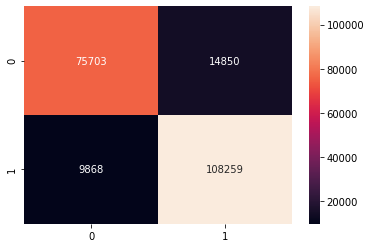

In [71]:
from sklearn.metrics import confusion_matrix
y_predict_test = modelC.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86     90553
           1       0.88      0.92      0.90    118127

    accuracy                           0.88    208680
   macro avg       0.88      0.88      0.88    208680
weighted avg       0.88      0.88      0.88    208680



In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
def apply_classifier(clf,xTrain,xTest,yTrain,yTest):
    
    clf.fit(xTrain, yTrain)
    predictions = clf.predict(xTest)
    conf_mtx = confusion_matrix(yTest,predictions)
    f, axes = plt.subplots(ncols=2, figsize=(15, 5))
    sns.heatmap(conf_mtx,annot=True,cmap='tab20c',cbar = False,fmt = "g",ax = axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Confusion Matrix'); 
    axes[0].xaxis.set_ticklabels(['Non Taker', 'Taker']);
    axes[0].yaxis.set_ticklabels(['Non Taker', 'Taker']);

    print("\n Classification report : \n {}".format(classification_report(yTest,predictions)))
    
    roc_auc = roc_auc_score(yTest,predictions) 
    print ("Area under ROC curve : ",roc_auc,"\n")

    fpr, tpr,_ = roc_curve(yTest, predictions)
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
    axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")


 Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.84      0.86     90553
           1       0.88      0.92      0.90    118127

    accuracy                           0.88    208680
   macro avg       0.88      0.88      0.88    208680
weighted avg       0.88      0.88      0.88    208680

Area under ROC curve :  0.876600406488296 



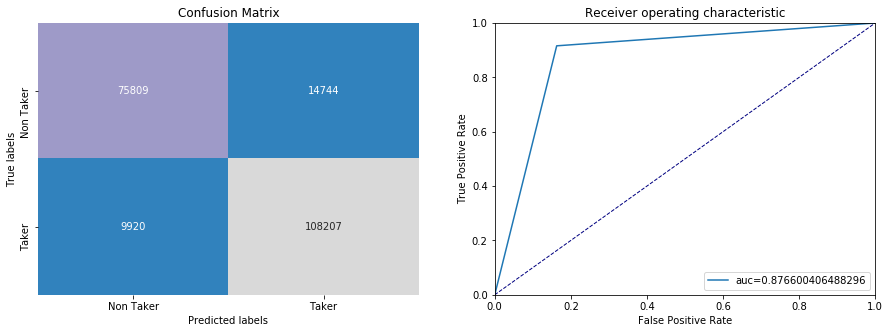

In [74]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier= RandomForestClassifier();
apply_classifier(RandomForestClassifier,X_train, X_test, y_train, y_test)

### Feature Importance

In [75]:
#def feature_importance_accuracy(model, thresholds, X_train, X_test, y_train, y_test, model_test='XGBClassifier'):
  for thresh in thresholds:
    # select features using threshold
    from sklearn.feature_selection import SelectFromModel
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model

    if (model_test=='XGBClassifier'):
      selectionmodel=XGBClassifier()
    elif (model_test=='LogisticRegression'):
      selectionmodel = LogisticRegression()
    elif (model_test=='DecisionTreeClassifier'):
      selectionmodel = DecisionTreeClassifier()
    elif (model_test=='RandomForestClassifier'):
      selectionmodel = RandomForestClassifier()
    elif (model_test=='AdaBoostClassifier'):
      selectionmodel = AdaBoostClassifier()
    elif (model_test=='GradientBoostingClassifier'):
      selectionmodel = GradientBoostingClassifier()
    elif (model_test=='BaggingClassifier'):
      selectionmodel = BaggingClassifier()
    else:
      selectionmodel= XGBClassifier()
    
    
    selectionmodel.fit(select_X_train, y_train)
    # eval model
    from sklearn.metrics import roc_auc_score,accuracy_score,f1_score
    select_X_test = selection.transform(X_test)
    y_pred = selectionmodel.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%, F1: %.2f%%, ROC AUC: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0, f1*100.0, roc_auc*100.0))

IndentationError: unexpected indent (<ipython-input-75-85bde3483a0c>, line 2)

In [ ]:
#rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
rf_threshold = np.sort(rf.feature_importances_)

feature_importance_accuracy(rf, rf_threshold, X_train_scaled, X_test_scaled, y_train, y_test,'RandomForestClassifier')

In [ ]:
#def feature_importance_df(model,FITUR,k,scale):
    sns.set_context("paper", font_scale=scale)
    fitur_imp=pd.DataFrame({'fitur':FITUR,'importances':model.feature_importances_})
    fitur_imp.sort_values(by='importances',ascending=False,inplace=True)
    sns.barplot(x='importances',y='fitur',data=fitur_imp[0:k],orient='h')
    plt.xlabel("Feature Importances")
    plt.ylabel("Feature")
    plt.show()

In [ ]:
#plt.figure(figsize=(10,10))
feature_importance_df(rf, list(X),26,1.5)

In [ ]:
#def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

In [ ]:
#rf_feature=imp_df(X.columns,rf.feature_importances_)[0:26]['feature']
#rf_feature

In [ ]:
#X_train_scaled=X_train_scaled[rf_feature]
#X_test_scaled=X_test_scaled[rf_feature]

In [ ]:
#X_train_scaled.head()

### HyperParameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

In [ ]:
X_train_2 = X_train.iloc[:1001, :]
y_train_2 = y_train.iloc[:1001, :]
X_test_2 = X_test.iloc[:301, :]
y_test_2 = y_test.iloc[:301, :]

In [ ]:
X_train_2.shape

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)
rf = RandomForestClassifier()

gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_2,y_train_2)

In [ ]:
gridF.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelC = RandomForestClassifier( n_estimators=300,max_depth= 30,min_samples_leaf=2,min_samples_split=15)
modelC.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
y_predict_test = modelC.predict(X_test)
print(classification_report(y_test, y_predict_test))

## SHAP Values

In [ ]:
import shap 
shap.initjs()

fromm asdad import asdsa
ssssshap_values = shap.TreeExplainer(modelE).shap_values(X_train_scaled_2)
shap.summary_plot(shap_values, X_train_scaled_2, plot_type="bar")

In [ ]:
shap_values = shap.TreeExplainer(modelC).shap_values(X_test_2)
shap.summary_plot(shap_values, X_test_2, plot_type="bar")

In [ ]:
explainer = shap.TreeExplainer(modelC)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values[1], X_test_scaled)

In [ ]:
explainer = shap.TreeExplainer(modelC)
shap_values = explainer.shap_values(X_test_scaled_2)
shap.dependence_plot('total_revenue', shap_values[1], X_test_scaled, interaction_index = 'rev_voice')

In [ ]:
row_to_show = 5
data_for_prediction = X_test_scaled_2.iloc[row_to_show]
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [ ]:
row_to_show = 50
data_for_prediction = X_test_scaled.iloc[row_to_show]
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

## Clustering

In [ ]:
ojol_clean_3=ojol_clean[ojol_clean['flag_taker']==0]
ojol_clean_2=ojol_clean_2[ojol_clean_2['flag_taker']==0]

In [ ]:
X = ojol_clean_2.loc[:, ojol_clean_2.columns != 'flag_taker']
y = ojol_clean_2.loc[:, ojol_clean_2.columns == 'flag_taker']
X_ori = ojol_clean_3.loc[:, ojol_clean_3.columns != 'flag_taker']
y_ori = ojol_clean_3.loc[:, ojol_clean_3.columns == 'flag_taker']

In [ ]:
y_pred = modelC.predict(X)

In [ ]:
X['predict']=y_pred
X_ori['predict']=y_pred

In [ ]:
X_2=X[X['predict']==1]
X_ori2=X_ori[X_ori['predict']==1]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for num_clusters in range(2,10):
    clusterer = KMeans(n_clusters=num_clusters, n_jobs=4)
    preds = clusterer.fit_predict(X_2)
    # centers = clusterer.cluster_centers_
    score = silhouette_score (X_2, preds, metric='euclidean')
    print ("For n_clusters = {}, Kmeans silhouette score is {})".format(num_clusters, score))

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 99)
y_kmeans = kmeans.fit_predict(X_2)

In [ ]:
X_ori2['cluster']=y_kmeans

In [ ]:
X_ori2['cluster'].value_counts()

In [ ]:
X_ori2.shape

In [ ]:
X_ori2.head()

In [ ]:
X_ori2.to_csv(r'C:\Users\agiesfri\Lat_DSA\Tugas\OJOL\clustering.csv',index = False)